In [1]:
#Imports
from random import randrange
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from neuralprophet import NeuralProphet

In [2]:
#Load DataFrame
df = pd.read_csv('../raw_data/stock_prices_latest.csv',nrows=20000)


In [3]:
#Have a look at data
df

,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient
0,MSFT,2016-05-16,50.80,51.96,50.75,51.83,49.7013,20032017,1.0
1,MSFT,2002-01-16,68.85,69.84,67.85,67.87,22.5902,30977700,1.0
2,MSFT,2001-09-18,53.41,55.00,53.17,54.32,18.0802,41591300,1.0
3,MSFT,2007-10-26,36.01,36.03,34.56,35.03,27.2232,288121200,1.0
4,MSFT,2014-06-27,41.61,42.29,41.51,42.25,38.6773,74640000,1.0
...,...,...,...,...,...,...,...,...,...
19995,AAL,2011-07-29,5.92,6.29,5.77,6.24,6.0345,28134584,1.0
19996,AAL,2008-05-22,5.57,5.79,5.14,5.22,5.0481,18112064,1.0
19997,AAL,2006-02-22,33.53,34.30,33.30,33.64,32.5323,1708311,1.0
19998,AAL,2007-03-21,49.00,49.73,48.13,49.41,47.7830,5568097,1.0


In [4]:
#Convert to datetime
df['date'] = pd.to_datetime(df['date'])

In [5]:
def get_symbols_lst():
    lst=df.symbol.unique()
    symbols_lst=[]
    while len(symbols_lst)<3:
        symbol=lst[randrange(len(lst))]
        if symbol not in symbols_lst:
            symbols_lst.append(symbol)
        symbol=lst[randrange(len(lst))]
    return symbols_lst

In [29]:
symbols_lst=get_symbols_lst()

In [30]:
symbols_lst

['GOOG', 'AAAP', 'EBAY']

In [31]:
#Create Df's to plot
df0=df[df['symbol']==symbols_lst[0]].reset_index()
df0 = df0[['date','close_adjusted']]
df0.columns = ['ds', 'y']
df0.sort_values(by=['ds'],inplace=True)

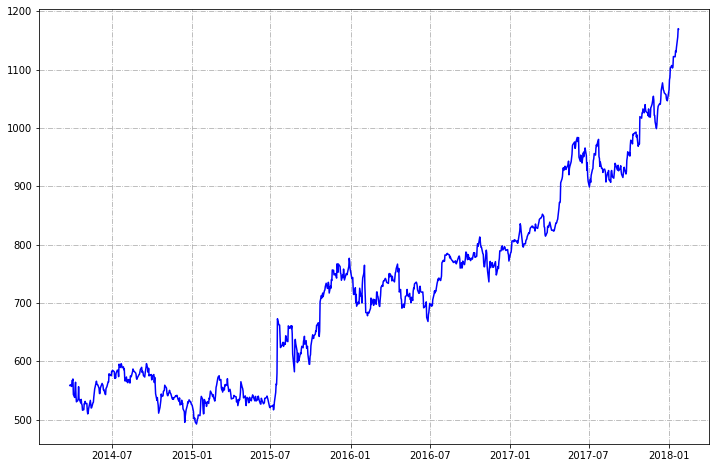

In [32]:
#Plot datas
plt.figure(figsize=(12, 8))
plt.grid(linestyle='-.')
plt.plot(df0['ds'], df0['y'], 'b')
plt.show()

In [35]:
len(df0)


965

In [37]:
index = round(len(df0)*80/100)
index

772

In [38]:
train = df0.iloc[:index]
test = df0.iloc[index:]

In [39]:
train.shape, test.shape


((772, 2), (193, 2))

In [40]:
test_length = test.shape[0]
test_length

193

In [41]:
train.sort_values(by=['ds'],inplace=True)
test.sort_values(by=['ds'],inplace=True)

<ipython-input-41-02f7a224a134>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.sort_values(by=['ds'],inplace=True)
<ipython-input-41-02f7a224a134>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.sort_values(by=['ds'],inplace=True)


In [42]:
train

,ds,y
908,2014-03-27,558.46
174,2014-03-28,559.99
724,2014-03-31,556.97
691,2014-04-01,567.16
443,2014-04-02,567.00
...,...,...
953,2017-04-12,824.32
639,2017-04-13,823.56
370,2017-04-17,837.17
928,2017-04-18,836.82


In [43]:
model = NeuralProphet()
metrics = model.fit(train, validate_each_epoch=True, freq="D")


INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 51


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 5.34E-03
Epoch[51/51]: 100%|██████████| 51/51 [00:07<00:00,  6.39it/s, SmoothL1Loss=0.00425, MAE=23.6, RegLoss=0, MAE_val=21.7, SmoothL1Loss_val=0.00459]


In [49]:
future = model.make_future_dataframe(train, periods=test_length, n_historic_predictions=len(train))
forecast = model.predict(future)

#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

Text(0.5, 1.0, 'GOOG Variations')

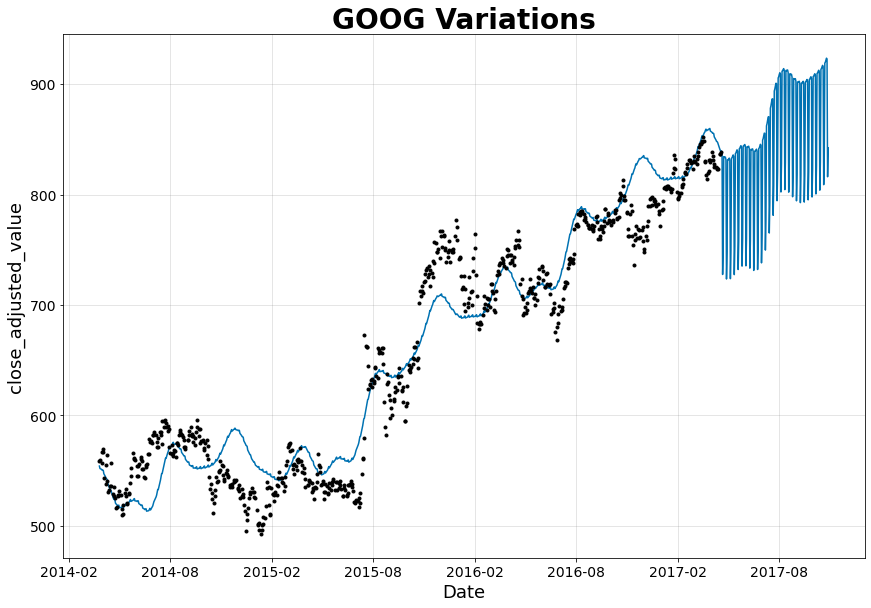

In [50]:
fig, ax = plt.subplots(figsize=(12,8))

model.plot(forecast, xlabel="Date", ylabel="close_adjusted_value", ax=ax)

ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title(symbols_lst[0]+" Variations", fontsize=28, fontweight="bold")


In [51]:
forecast


,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2014-03-27,558.46,554.081421,-4.378579,509.195129,16.348301,28.538004
1,2014-03-28,559.99,551.881348,-8.108652,509.309570,16.002632,26.569120
2,2014-03-31,556.97,551.073486,-5.896514,509.652954,14.275776,27.144754
3,2014-04-01,567.16,550.322266,-16.837734,509.767395,13.479257,27.075611
4,2014-04-02,567.00,550.480469,-16.519531,509.881866,12.578963,28.019650
...,...,...,...,...,...,...,...
960,2017-10-25,NaN,921.919678,NaN,888.119995,5.780019,28.019650
961,2017-10-26,NaN,923.512146,NaN,888.462646,6.511499,28.538004
962,2017-10-27,NaN,922.664551,NaN,888.805176,7.290264,26.569120
963,2017-10-28,NaN,816.112061,NaN,889.147827,8.114907,-81.150627


In [22]:
test

,ds,y


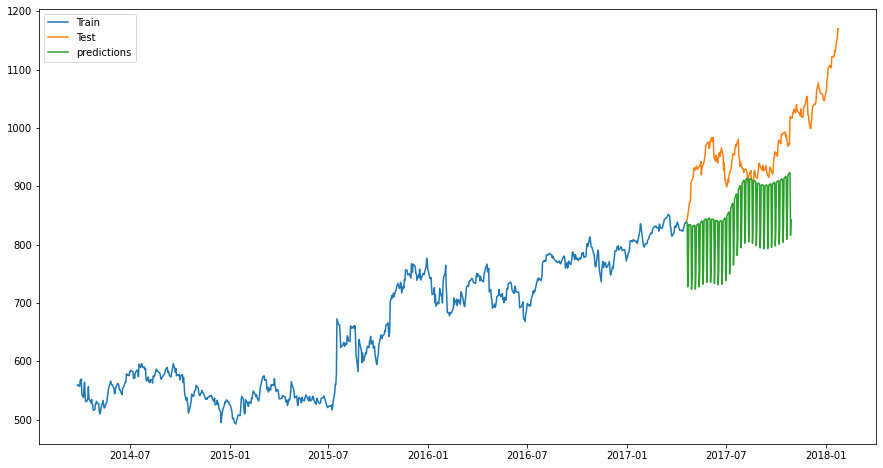

In [52]:
plt.figure(figsize=(15, 8))
plt.plot(train['ds'], train['y'], label="Train")
plt.plot(test['ds'], test['y'], label="Test")
plt.plot(forecast[-test_length:]['ds'], forecast[-test_length:]['yhat1'], label="predictions")
plt.legend(loc="best")
plt.show()

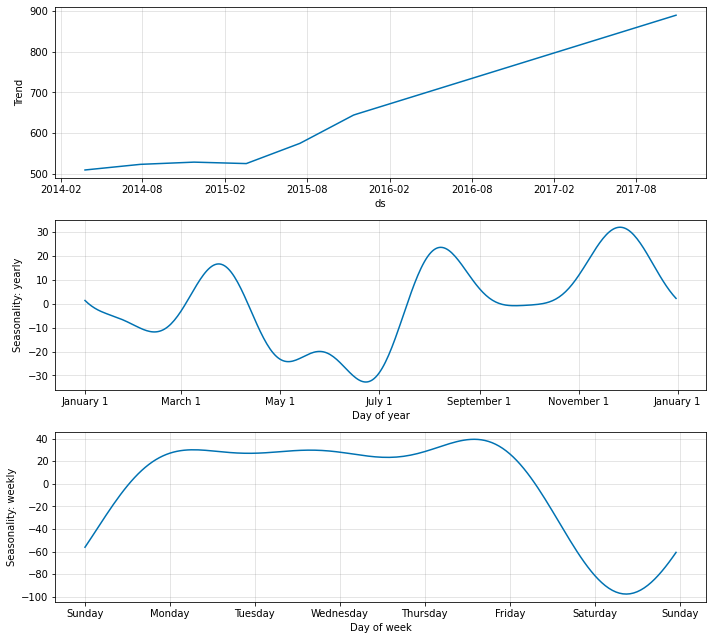

In [53]:
fig_comp = model.plot_components(forecast)

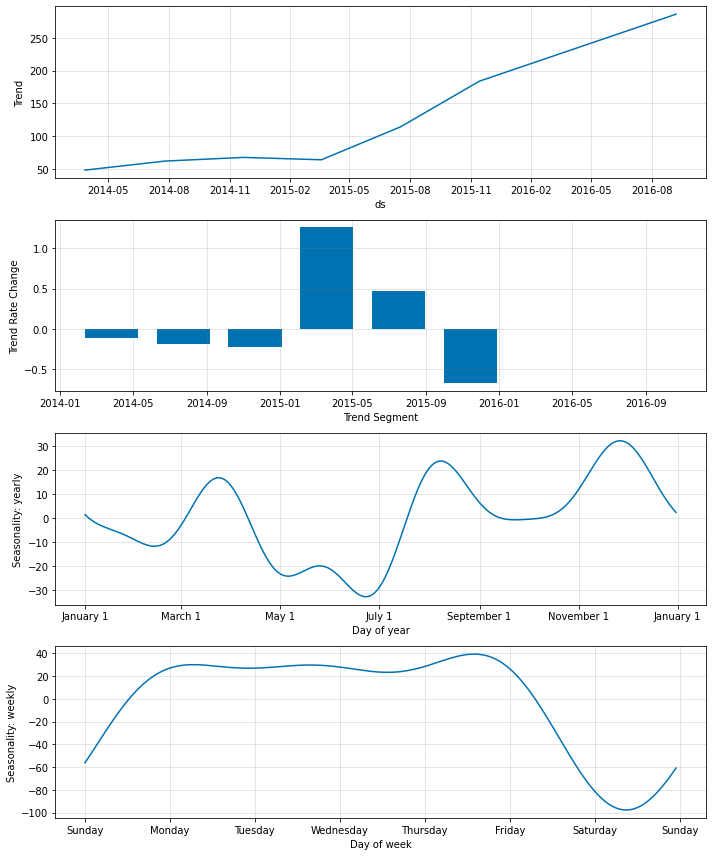

In [54]:
fig_param = model.plot_parameters()

Text(0.5, 1.0, 'Model Metrics (MAE)')

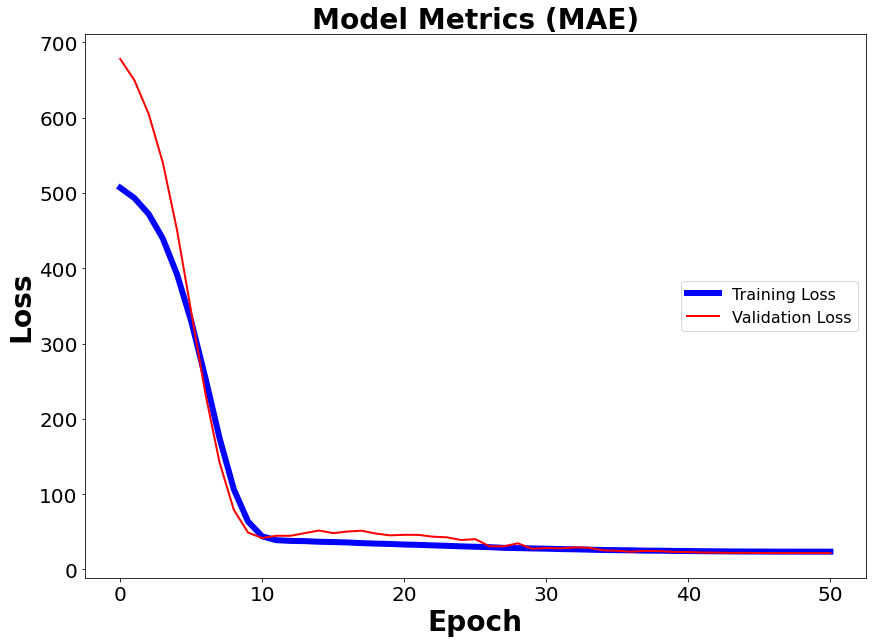

In [56]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(metrics["MAE"], '-b', linewidth=6, label="Training Loss")  
ax.plot(metrics["MAE_val"], '-r', linewidth=2, label="Validation Loss")

ax.legend(loc='center right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("Epoch", fontsize=28, fontweight="bold")
ax.set_ylabel("Loss", fontsize=28, fontweight="bold")

ax.set_title("Model Metrics (MAE)", fontsize=28, fontweight="bold")